In [10]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargando el dataset desde el archivo CSV
df_goles_uefa = pd.read_csv("C:\\Users\\Daniel Bolaños\\Downloads\\golesuefa20-22.csv")  # Asegúrate de ajustar la ruta

In [11]:
# Mostrando las primeras filas del dataframe para entender su estructura
print(df_goles_uefa.head())

   serial  player_name         club    position  goals  right_foot  left_foot  \
0       1      Benzema  Real Madrid     Forward     15          11          1   
1       2  Lewandowski       Bayern     Forward     13           8          3   
2       3       Haller         Ajax     Forward     11           3          4   
3       4        Salah    Liverpool     Forward      8           0          8   
4       5       Mahrez    Man. City  Midfielder      7           1          4   

   headers  others  inside_area  outside_areas  penalties  match_played  
0        3       0           13              2          3            12  
1        1       1           13              0          3            10  
2        3       1           11              0          1             8  
3        0       0            7              1          1            13  
4        2       0            7              0          2            12  


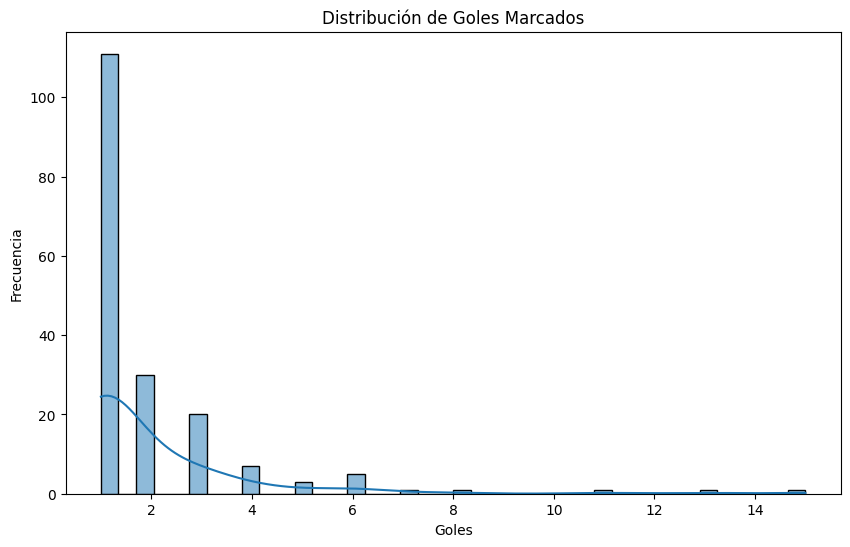

In [12]:
# Histograma para visualizar la distribución de los goles marcados
plt.figure(figsize=(10, 6))
sns.histplot(df_goles_uefa['goals'], kde=True)
plt.title('Distribución de Goles Marcados')
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.show()


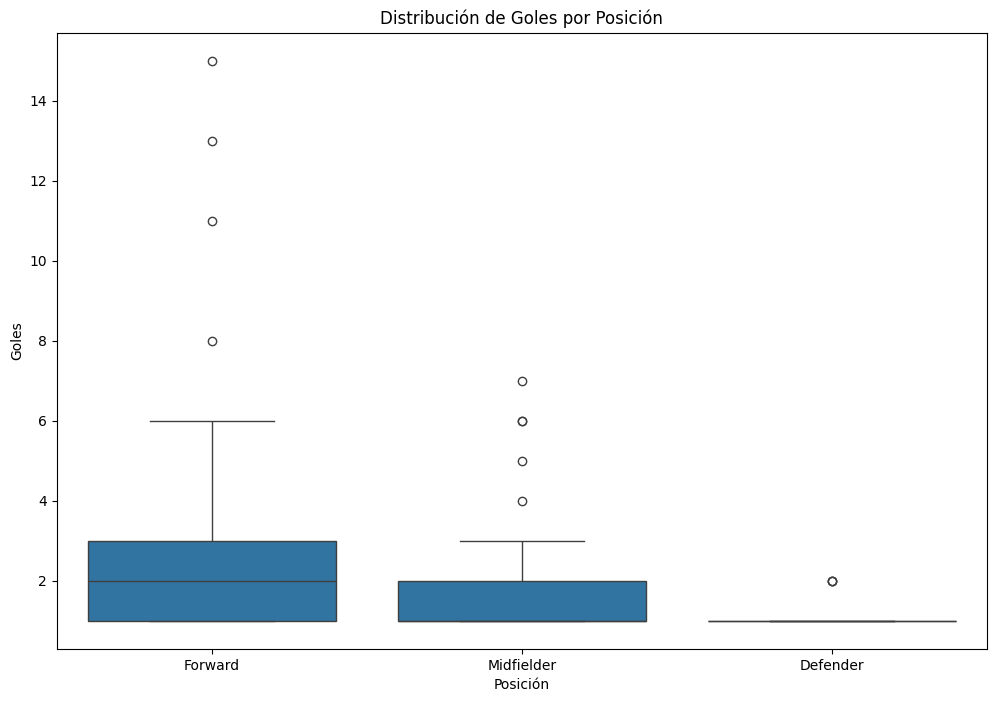

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset asegurándonos de que la ruta al archivo CSV sea la correcta
df_goles_uefa = pd.read_csv(r"C:\Users\Daniel Bolaños\Downloads\golesuefa20-22.csv")

# Ahora que df_goles_uefa está definido, puedes crear tu boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='goals', data=df_goles_uefa)
plt.title('Distribución de Goles por Posición')
plt.xlabel('Posición')
plt.ylabel('Goles')
plt.show()



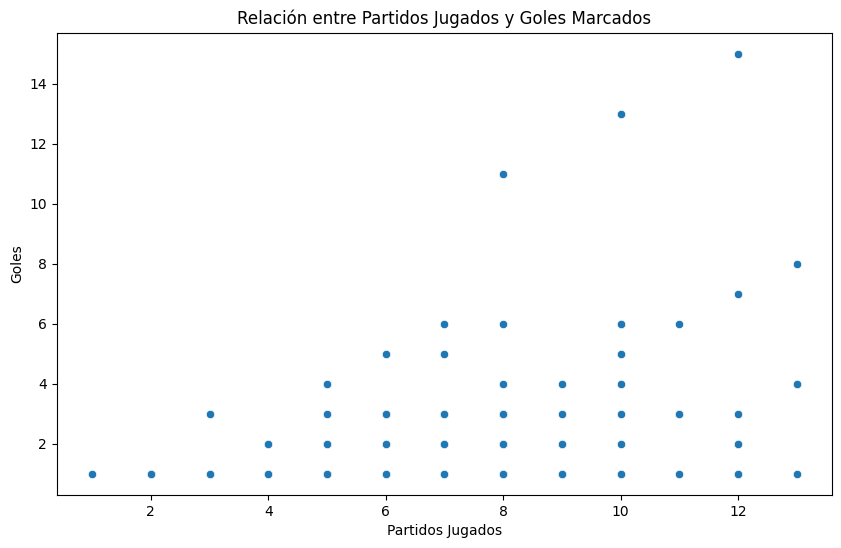

In [ ]:
# Scatter plot para explorar la relación entre dos variables, ej. partidos jugados y goles marcados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='match_played', y='goals', data=df_goles_uefa)
plt.title('Relación entre Partidos Jugados y Goles Marcados')
plt.xlabel('Partidos Jugados')
plt.ylabel('Goles')
plt.show()

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15872\1232787790.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='goals', y='club', data=goles_por_club_sorted, palette='tab20')


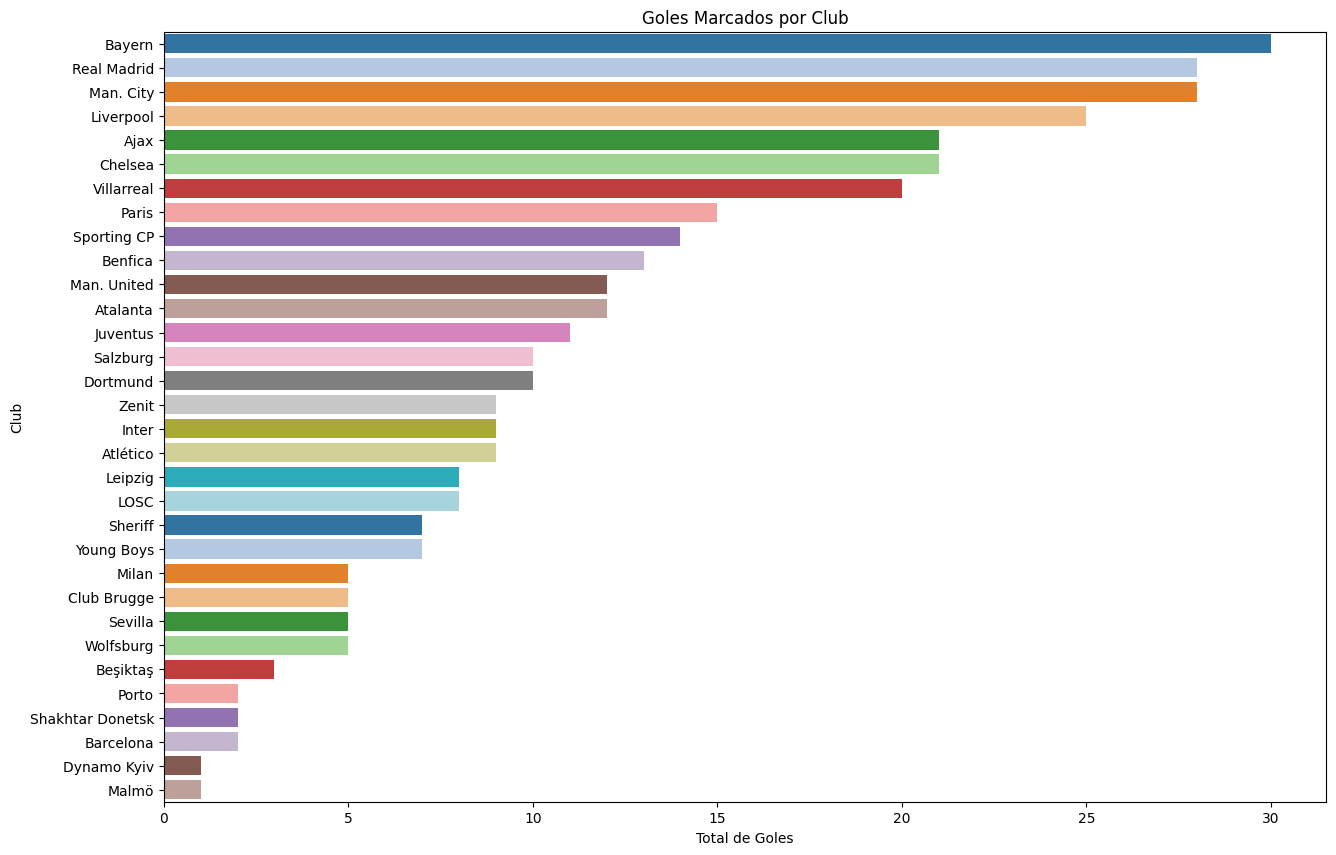

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'df_goles_uefa' es tu DataFrame y ya está cargado
# Sumamos los goles por club
goles_por_club = df_goles_uefa.groupby('club')['goals'].sum().reset_index()

# Ordenamos los clubes por goles para una mejor visualización
goles_por_club_sorted = goles_por_club.sort_values('goals', ascending=False)

# Visualización
plt.figure(figsize=(15, 10))
sns.barplot(x='goals', y='club', data=goles_por_club_sorted, palette='tab20')

plt.title('Goles Marcados por Club')
plt.xlabel('Total de Goles')
plt.ylabel('Club')
plt.show()


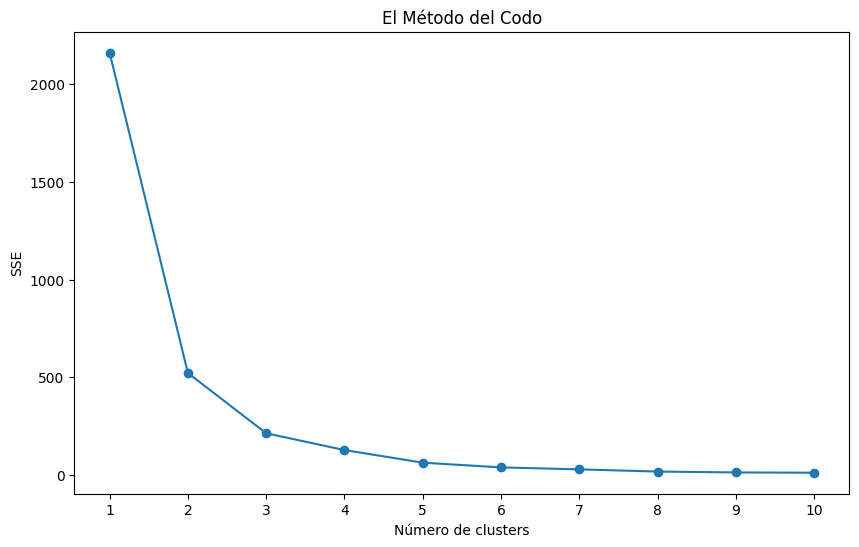

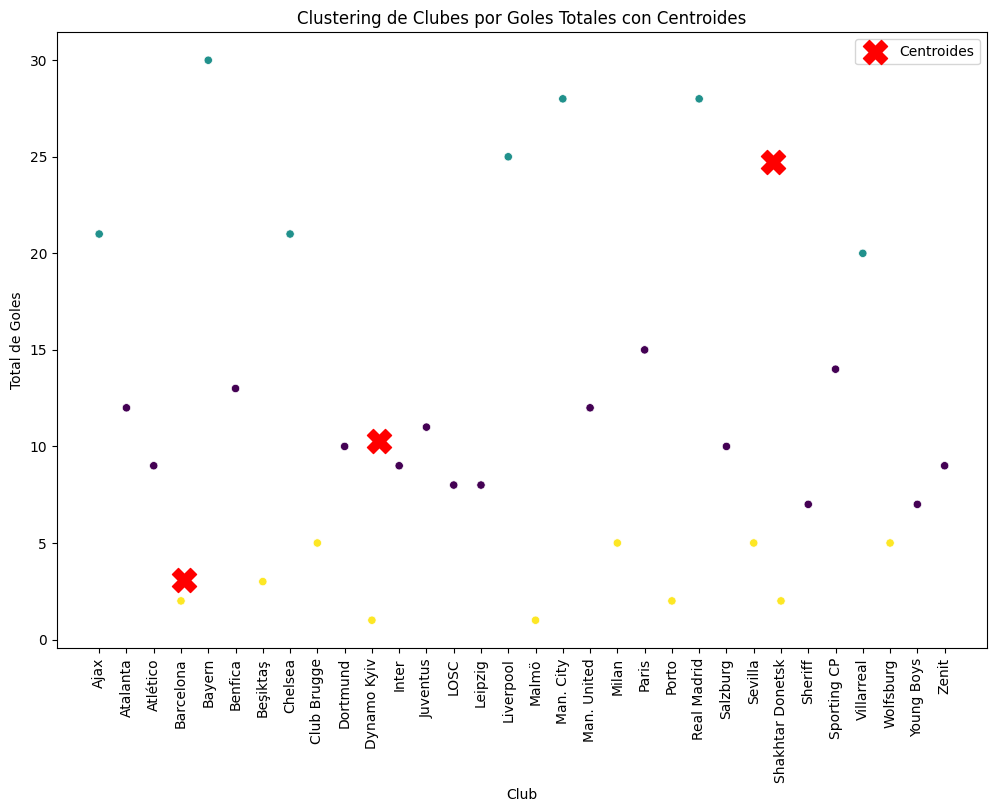

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Usando los mismos datos preparados anteriormente
X = goles_por_club['goals'].values.reshape(-1, 1)

# Método del codo para encontrar el número óptimo de clusters
sse = []  # Suma de los cuadrados de las diferencias
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('El Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.show()

# Supongamos que el número óptimo de clusters determinado es 3, por ejemplo (ajusta según tu gráfico)
n_clusters_optimo = 3
kmeans_optimo = KMeans(n_clusters=n_clusters_optimo, random_state=42)
goles_por_club['cluster_optimo'] = kmeans_optimo.fit_predict(X)

# Centroides de los clusters
centroides = kmeans_optimo.cluster_centers_

# Visualización de los clusters con centroides
plt.figure(figsize=(12, 8))
sns.scatterplot(data=goles_por_club, x='club', y='goals', hue='cluster_optimo', palette='viridis', legend=False)
plt.scatter(centroides[:, 0], centroides[:, 0], s=300, c='red', label='Centroides', marker='X')
plt.xticks(rotation=90)
plt.title('Clustering de Clubes por Goles Totales con Centroides')
plt.xlabel('Club')
plt.ylabel('Total de Goles')
plt.legend()
plt.show()


In [ ]:
print(df_goles_uefa.columns)


Index(['serial', 'player_name', 'club', 'position', 'goals', 'right_foot',
       'left_foot', 'headers', 'others', 'inside_area', 'outside_areas',
       'penalties', 'match_played', 'cluster'],
      dtype='object')


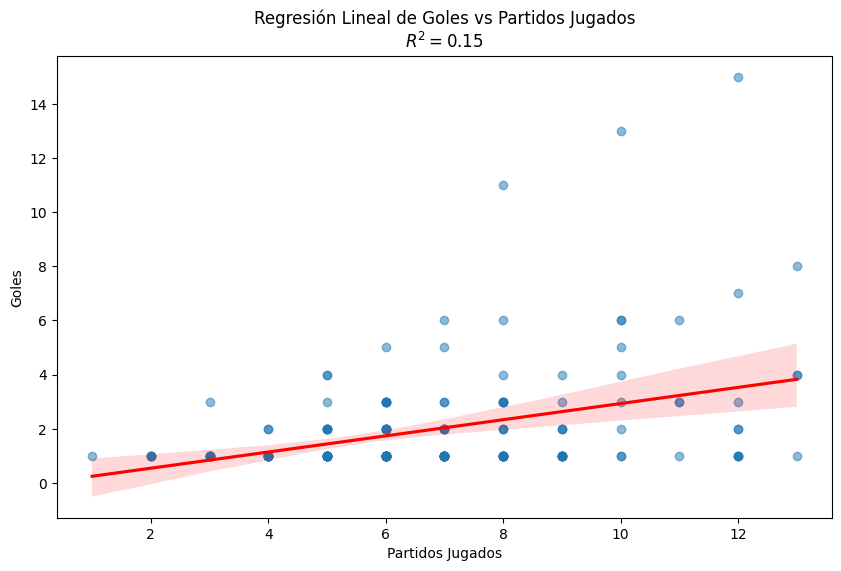

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargamos el dataset
df_goles_uefa = pd.read_csv(r"C:\Users\Daniel Bolaños\Downloads\golesuefa20-22.csv")

# Preparamos los datos para el modelo de regresión lineal
X = df_goles_uefa[['match_played']]  # La variable independiente necesita estar en formato 2D para sklearn
y = df_goles_uefa['goals']

# Ajustamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Usamos el modelo ajustado para predecir los valores de y
y_pred = model.predict(X)

# Calculamos R cuadrado
r_squared = r2_score(y, y_pred)

# Gráfico de regresión lineal
plt.figure(figsize=(10, 6))
sns.regplot(x='match_played', y='goals', data=df_goles_uefa, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title(f'Regresión Lineal de Goles vs Partidos Jugados\n$R^2 = {r_squared:.2f}$')
plt.xlabel('Partidos Jugados')
plt.ylabel('Goles')
plt.show()


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_13412\4211514019.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='goals', y='club', data=goles_por_club_sorted, palette='tab20', ax=axes[1, 1])


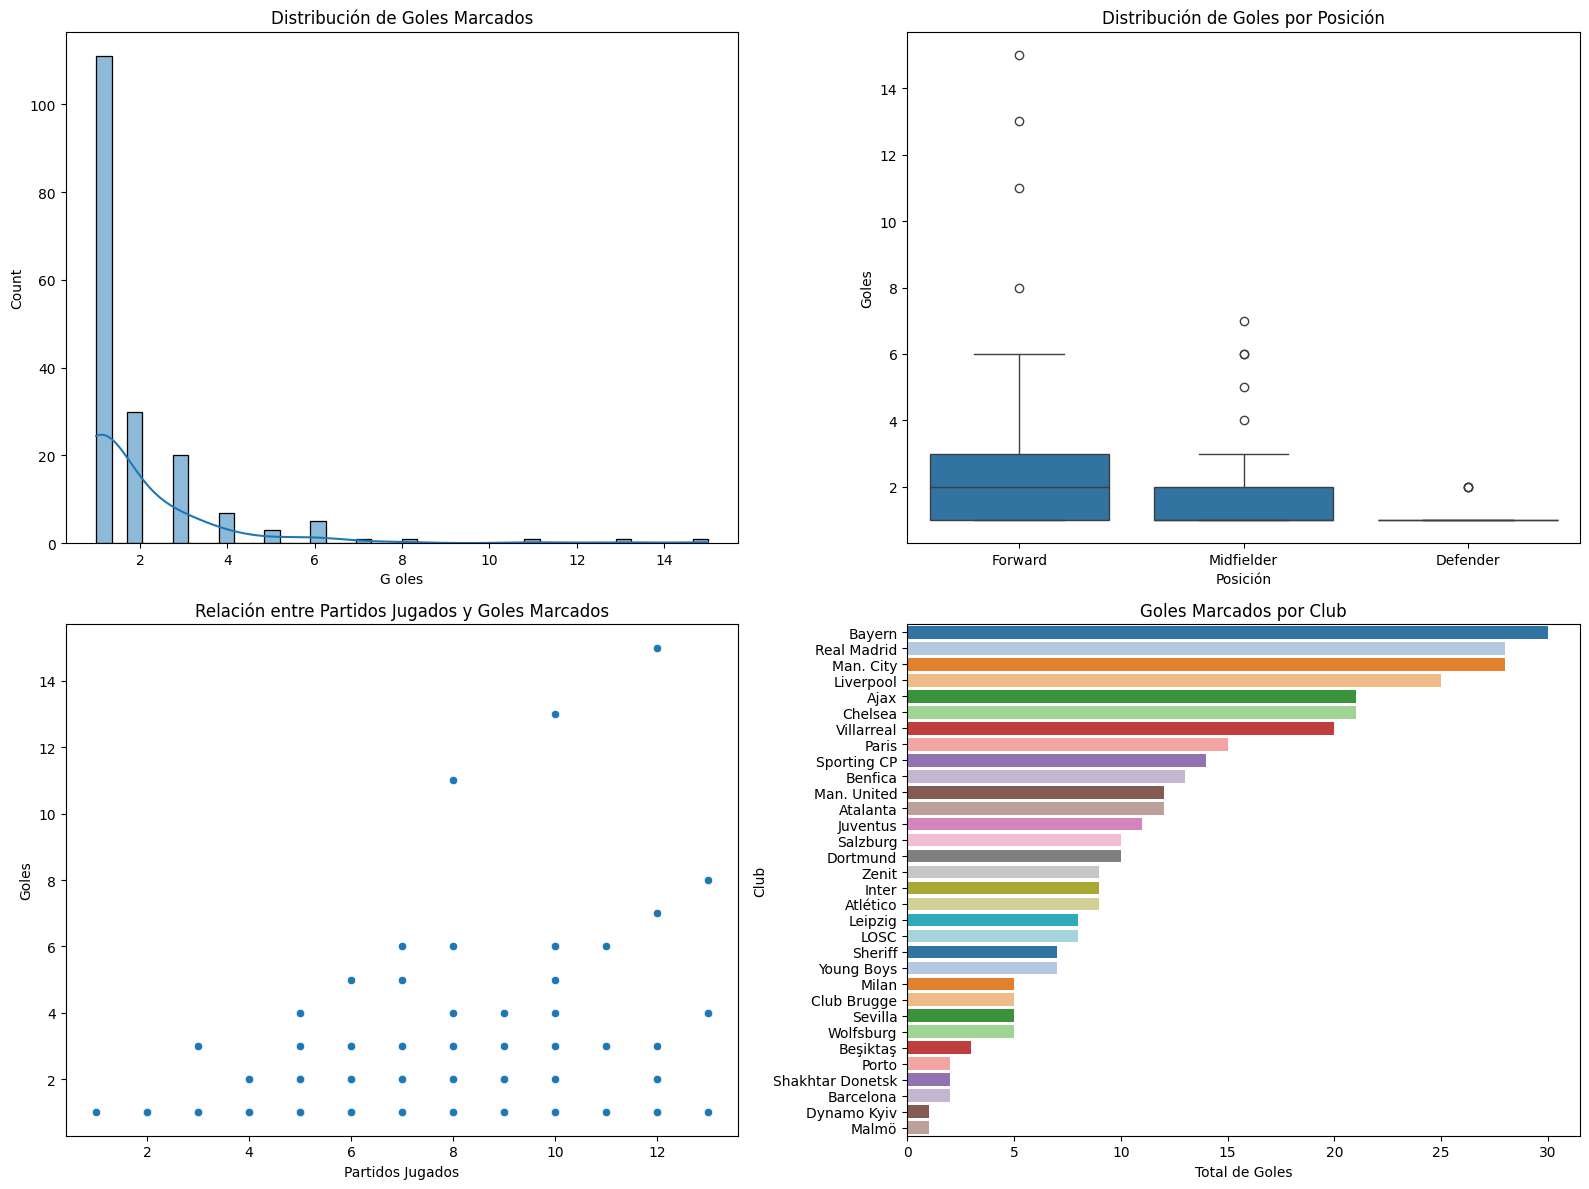

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de tener la ruta correcta a tu archivo CSV
df_goles_uefa = pd.read_csv(r"C:\Users\Daniel Bolaños\Downloads\golesuefa20-22.csv")

# Ahora, procedemos a generar los gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de goles
sns.histplot(df_goles_uefa['goals'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Goles Marcados')
axes[0, 0].set_xlabel('G oles')

# Boxplot de goles por posición
sns.boxplot(x='position', y='goals', data=df_goles_uefa, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Goles por Posición')
axes[0, 1].set_xlabel('Posición')
axes[0, 1].set_ylabel('Goles')

# Scatter plot de partidos jugados vs goles
sns.scatterplot(x='match_played', y='goals', data=df_goles_uefa, ax=axes[1, 0])
axes[1, 0].set_title('Relación entre Partidos Jugados y Goles Marcados')
axes[1, 0].set_xlabel('Partidos Jugados')
axes[1, 0].set_ylabel('Goles')

# Barras de goles marcados por club (Este requiere un poco de preparación adicional)
goles_por_club = df_goles_uefa.groupby('club')['goals'].sum().reset_index()
goles_por_club_sorted = goles_por_club.sort_values('goals', ascending=False)
sns.barplot(x='goals', y='club', data=goles_por_club_sorted, palette='tab20', ax=axes[1, 1])
axes[1, 1].set_title('Goles Marcados por Club')
axes[1, 1].set_xlabel('Total de Goles')
axes[1, 1].set_ylabel('Club')

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para dar un padding especificado
plt.show()
